In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
df = pd.read_csv("C:\\Users\Ali\\DataScience_Projects\\Kaggle_Competition\\train_set.csv")
df.head()

,RecordId,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X70,X71,X72,X73,X74,X75,X76,X77,X78,Y
0,1,87.000000,34.118411,0,2,0,165.100000,1,829,2,...,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,82.372284,31.573280,0,0,1,162.983897,1,724,0,...,0.033431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,50.000000,27.771653,0,0,1,165.100000,1,895,2,...,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,66.236109,26.515922,0,0,1,167.009549,1,637,0,...,0.039363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5,81.303299,20.843691,0,0,1,158.165419,0,564,0,...,0.069242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [28]:
X= df.iloc[:, 1:78]  # All columns except the last one
y = df.iloc[:, 78]   # Only the last column

In [29]:
#selector = VarianceThreshold(0.5)
#X = selector.fit_transform(X)
df = df.dropna(axis=0)

In [30]:
scaled_data = SimpleImputer(strategy='mean')
X = scaled_data.fit_transform(X)
X = pd.DataFrame(X)

#Normalize
# Sample data
data = df

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
df = scaler.fit_transform(data)

In [31]:
standardizer = StandardScaler()
standardizedX = standardizer.fit_transform(X)
X = pd.DataFrame(standardizedX)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100, stratify=y)

In [33]:
model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42)

In [34]:
bagging_model = BaggingClassifier(estimator=model, n_estimators=30, random_state=100, n_jobs= -1)

0.9219891514877648


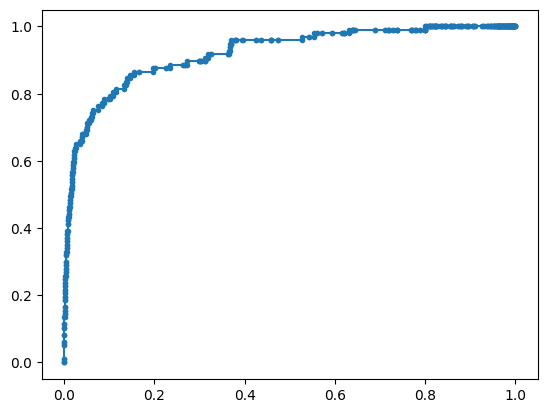

In [35]:
bagging_model.fit(X_train, y_train)
md_predictions_probs = bagging_model.predict_proba(X_test)
md_predictions_probs = md_predictions_probs[:, 1]
md_roc = roc_auc_score(y_test, md_predictions_probs)
print(md_roc)
fpr, tpr, _ = roc_curve(y_test, md_predictions_probs, pos_label=1)
plt.plot(fpr, tpr, marker = '.')

In [36]:
bagging_model.fit(X,y)

KeyboardInterrupt: 

In [ ]:
test_data = pd.read_csv("C:\\Users\Ali\\DataScience_Projects\\Kaggle_Competition\\test_set.csv")
recordId = test_data['RecordId']
test_data = test_data.drop(columns = 'RecordId')

In [ ]:
#test_data = selector.transform(test_data)
test_data = SimpleImputer(strategy='mean').fit_transform(test_data)
#minMaxTest = minmaxer.fit_transform(test_data)
#test_data = standardizer.fit_transform(test_data)
#test_data = pd.DataFrame(test_data)
#test_data = pca.transform(test_data)

#Normalize
# Sample data
data = test_data

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
test_data = scaler.fit_transform(data)

In [ ]:
prediction = bagging_model.predict_proba(test_data)
prediction = prediction[:, 1]
finaldf = pd.concat([recordId, pd.DataFrame(prediction, columns=['Y'])], axis=1)
finaldf.to_csv("C:\\Users\Ali\\DataScience_Projects\\Kaggle_Competition\\gradient_bagging_test_results.csv", index= False)